<a href="https://colab.research.google.com/github/kl2554/nangi/blob/main/Deep_Learning_Mini_Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:


import numpy as np
import yfinance as yf
import pandas as pd
import os
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt




In [11]:
if os.path.exists("CSE.csv"):
    sp500 = pd.read_csv("CSE.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("CSE.csv")

In [13]:
gstock_data = pd.read_csv('CSE.csv')
gstock_data .head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [31]:


data = gstock_data['Stock Splits'].values.reshape(-1, 1)

In [36]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)
N = 60  # You can adjust this window size
X, y = [], []
for i in range(len(data_normalized) - N):
    X.append(data_normalized[i:i + N])
    y.append(data_normalized[i + N])

X, y = np.array(X), np.array(y)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
603/603 [==============================] - 39s 58ms/step - loss: 0.0000e+00
Epoch 2/50
603/603 [==============================] - 35s 58ms/step - loss: 0.0000e+00
Epoch 3/50
603/603 [==============================] - 33s 55ms/step - loss: 0.0000e+00
Epoch 4/50
603/603 [==============================] - 32s 54ms/step - loss: 0.0000e+00
Epoch 5/50
603/603 [==============================] - 33s 55ms/step - loss: 0.0000e+00
Epoch 6/50
603/603 [==============================] - 32s 53ms/step - loss: 0.0000e+00
Epoch 7/50
603/603 [==============================] - 33s 55ms/step - loss: 0.0000e+00
Epoch 8/50
603/603 [==============================] - 32s 54ms/step - loss: 0.0000e+00
Epoch 9/50
603/603 [==============================] - 32s 54ms/step - loss: 0.0000e+00
Epoch 10/50
603/603 [==============================] - 33s 55ms/step - loss: 0.0000e+00
Epoch 11/50
603/603 [==============================] - 32s 53ms/step - loss: 0.0000e+00
Epoch 12/50
603/603 [====================

In [42]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

151/151 [==============================] - 4s 17ms/step


In [52]:
# Step 9: Evaluate the model using RMSE
# Assuming 'Date' is a column in your DataFrame
date_index = ['Date'][N + len(X_train):].index

rmse = np.sqrt(mean_squared_error(gstock_data ['Stock Splits'].values[N + len(X_train):], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Alternatively, if 'Date' is in datetime format, you can convert it to numerical values
# date_index = df['Date'][N + len(X_train):].astype(int).index
# rmse = np.sqrt(mean_squared_error(df['StockPrice'].values[N + len(X_train):], predictions))
# print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 0.0


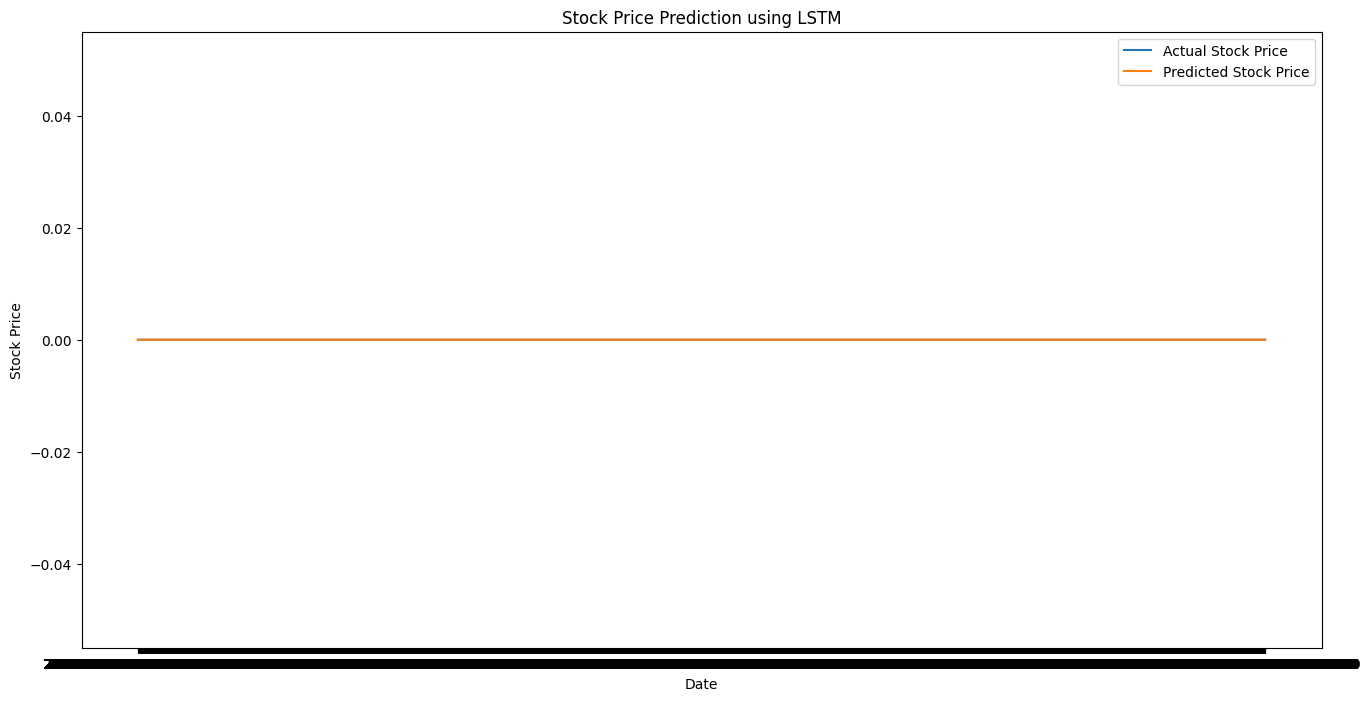

In [53]:
plt.figure(figsize=(16, 8))
plt.plot(gstock_data['Date'][N + len(X_train):], gstock_data['Stock Splits'][N + len(X_train):], label='Actual Stock Price')
plt.plot(gstock_data['Date'][N + len(X_train):], predictions, label='Predicted Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()